In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import logging
import datetime
import warnings
from lmfit.models import PseudoVoigtModel, GaussianModel
from jupyterthemes import jtplot

In [34]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
jtplot.style('default', grid=False)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

plt.rcParams['errorbar.capsize'] = 8
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.5
plt.rc('font', size= 18)
plt.rc('legend', fontsize= 15)
plt.rc('xtick', labelsize= 18)
plt.rc('ytick', labelsize= 18)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)
plt.rcParams["xtick.major.size"] = 8

# Stoichiometry analysis of data BaCl$_2$ and Ba(ClO$_4$)$_2$ on Cu policrystal
1- Sublimations of Ba(ClO$_4$)$_2$ (10th Aug 2020)

2- Sublimations of BaCl$_2$ (26th October 2020)

Each set contain Clean Cu data, BaCl* sublimation data and FBI deposition _after_ Ba (ALInjected FBI-ester in AcN in the 1st case and sublimated in the 2nd)

## Import data

In [3]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/**/*.sxy'
files = glob.glob(path, recursive=True)
files.pop(3)
files[0], files[1] = files[1], files[0]
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/**/*.sxy'
files += glob.glob(path, recursive=True)
files.pop(6)
files.sort()
files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201026_Cu_BaCl2_subl_45min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201026_Cu_BaCl2_subl_45min_FBI_subl_20min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201027_Cu_BaCl2_subl_45min_FBI_subl_40min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200810_Cu_BaClO42_sublim_15min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200810_Cu_BaClO42_sublim_1h.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200811_Cu_BaClO42_sublim_2h15min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200811_Cu_BaClO42_sublim_3h45min.sxy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200813_Cu_BaClO42_sublim_3h45min_FBI_ester_200pulses.sxy']

In [4]:
cu_exps = []
for f in files:
    cu_exps.append(read_processed_xp(f))

scaledCl2 = []
scaledClO4 = []

# for f, c in zip(files, colors):
for xp in cu_exps:
    if 'BaCl2' in xp.name:
        scaledCl2.append(xp)
    elif 'BaClO42' in xp.name:
        scaledClO4.append(xp)

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201026_Cu_BaCl2_subl_45min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201026_Cu_BaCl2_subl_45min_FBI_subl_20min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaCl2/proc/Cu_BaCl220201027_Cu_BaCl2_subl_45min_FBI_subl_40min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200810_Cu_BaClO42_sublim_15min.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200810_Cu_BaClO42_sublim_1h.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/Cu_BaClO42/proc/Cu_BaClO4220200811

In [5]:
names = ['IIa - Ba(ClO$_4$)$_2$ 15min', 'IIb - Ba(ClO$_4$)$_2$ 60min', 'IIc - Ba(ClO$_4$)$_2$ 135 min', 'IId - Ba(ClO$_4$)$_2$ 225 min']
colors = ['c', 'purple', 'g']
for xp, n, c in zip(scaledClO4, names, colors):
    xp.name = n
    xp.color = c

In [6]:
scaledCl2[0].name = 'I - BaCl$_2$ 45min'
scaledCl2[0].color = 'k'

In [7]:
[xp.name for xp in scaledCl2]

['I - BaCl$_2$ 45min',
 'Cu_BaCl2_subl_45min_FBI_subl_20min',
 'Cu_BaCl2_subl_45min_FBI_subl_40min']

In [8]:
[xp.name for xp in scaledClO4]

['IIa - Ba(ClO$_4$)$_2$ 15min',
 'IIb - Ba(ClO$_4$)$_2$ 60min',
 'IIc - Ba(ClO$_4$)$_2$ 135 min',
 'Cu_BaClO42_sublim_3h45min',
 '"Cu_BaClO42_sublim_3h45min\\n+FBI_ester_200pulses"']

## Fit O 1s

In [32]:
region = 'O_1s'

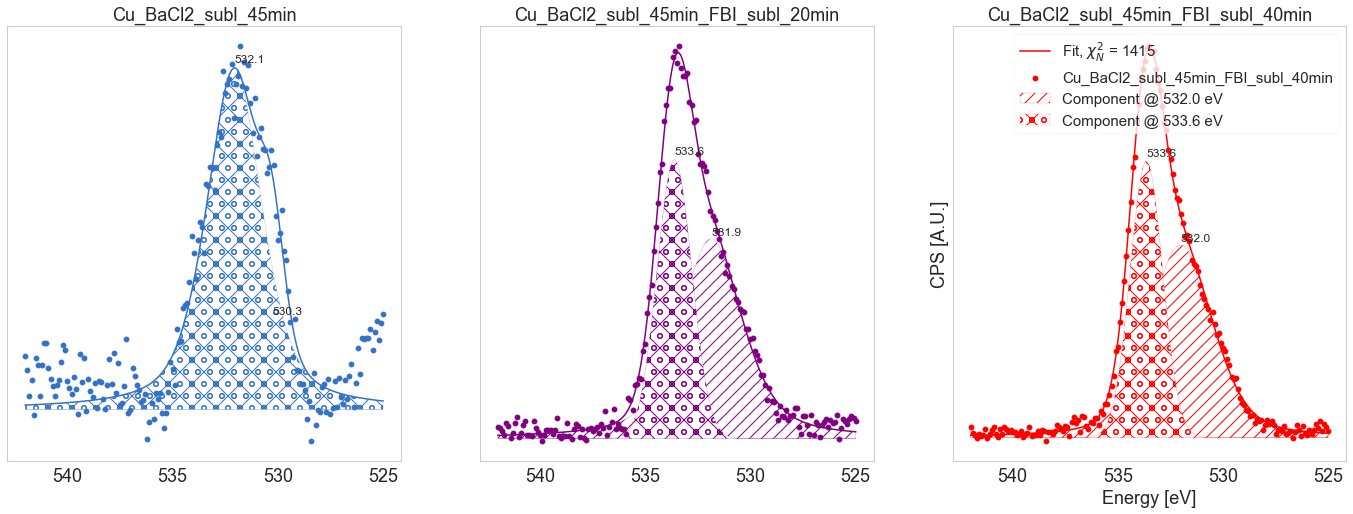

In [64]:
fig, ax = plt.subplots(1, len(scaledCl2), figsize=(8*len(scaledCl2), 8))
for i,xp in enumerate(scaledCl2):
    Fn = XPFit(xp, region=region)
    Fn.double_voigt(sepPt=531)
    Fn.plot(ax = ax[i] )
    ax[i].set(title=xp.name, yticks=[])
    ax[i].invert_xaxis()
ax[i].invert_xaxis()

Fn.set_areas()

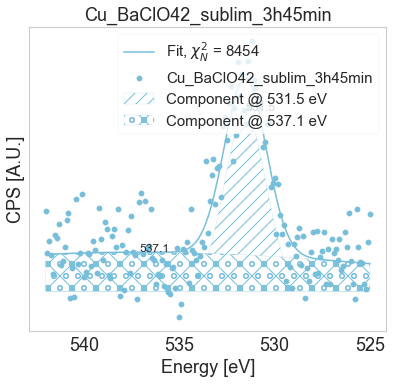

In [61]:
Fn = XPFit(scaledClO4[3], region=region)

Fn.double_voigt(sepPt=531)
Fn.plot( )
# plt.gca().get_legend().remove()
plt.gca().set(title=scaledClO4[3].name, yticks=[])
Fn.set_areas()

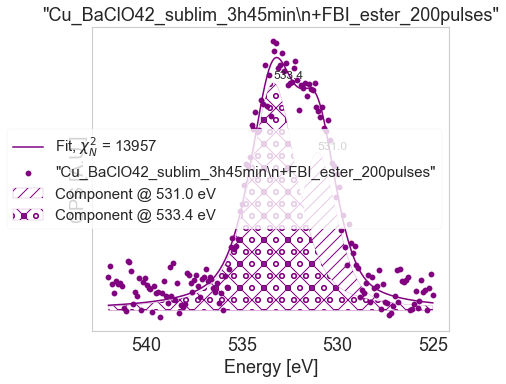

In [62]:
Fn = XPFit(scaledClO4[4], region=region)

Fn.double_voigt(sepPt=531)
Fn.plot( )
# plt.gca().get_legend().remove()
plt.gca().set(title=scaledClO4[4].name, yticks=[])
Fn.set_areas()

In [231]:
region = 'O_1s'
table_fit_area(fbi_sel, region=region)

comp	center	fwhm	amplitude	area	
v1	531.76	 2.66	 1546.67	 0.60
v2	533.37	 1.84	 996.47	 0.40
v1	531.79	 2.18	 1400.00	 0.57
v2	533.37	 2.05	 1093.72	 0.43
v1	531.25	 2.33	 3376.04	 0.58
v2	533.00	 2.05	 2467.41	 0.42


In [232]:
table_fit_area(fbiBa_exps, region='O_1s')

comp	center	fwhm	amplitude	area	
v1	532.32	 2.69	 3187.10	 0.73
v2	533.46	 1.75	 1127.93	 0.27
v1	531.89	 2.39	 1518.29	 0.53
v2	533.40	 2.04	 1295.04	 0.47
v1	531.99	 2.68	 2405.46	 0.71
v2	533.57	 1.89	 954.18	 0.29


## Fit N 1s 

Modify user pars


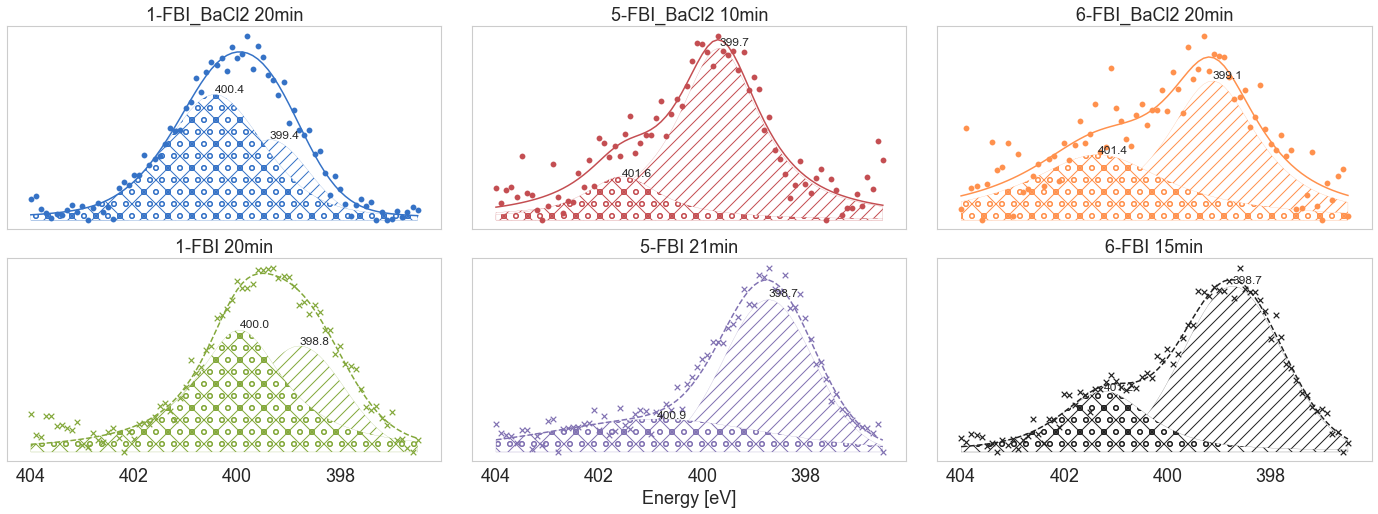

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 3, sharex=True, figsize=(19, 7), )
region = 'N_1s'

for i,xp in enumerate(fbiBa_exps):
    Fn = XPFit(xp, region=region)
    if i == 2: Fn.preset_pars(key='v1_amplitude', val=300)

    Fn.double_voigt(sepPt=400)
    Fn.plot( ax = ax1[i])
    ax1[i].set(title=xp.name, yticks=[])
    
    Fn.set_areas()
    
for i, xp in enumerate(fbi_sel):    
    Fn = XPFit(xp, region=region)

    Fn.double_voigt(sepPt=400)
    Fn.plot( ax = ax2[i], marker='x', ls = 'dashed')

    ax2[i].invert_xaxis()
    ax2[i].set(title=xp.name, yticks=[])
    Fn.set_areas()
ax2[1].set_xlabel('Energy [eV]')
plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)
ax2[i].get_legend().remove()
ax2[i].set(xlabel='', ylabel='')
# plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/fits_n1s.png', dpi=200)

In [37]:
fbiBa_exps[1].fit[region].params['v1_amplitude']
# fbiBa_exps[2].fit[region].params['v1_fraction']

<Parameter 'v1_amplitude', value=314.5924922715557 +/- 42.5, bounds=[-inf:inf]>

## Fit C 1s

Modify user pars
Modify user pars
Modify user pars
Modify user pars
Modify user pars
Modify user pars
Modify user pars


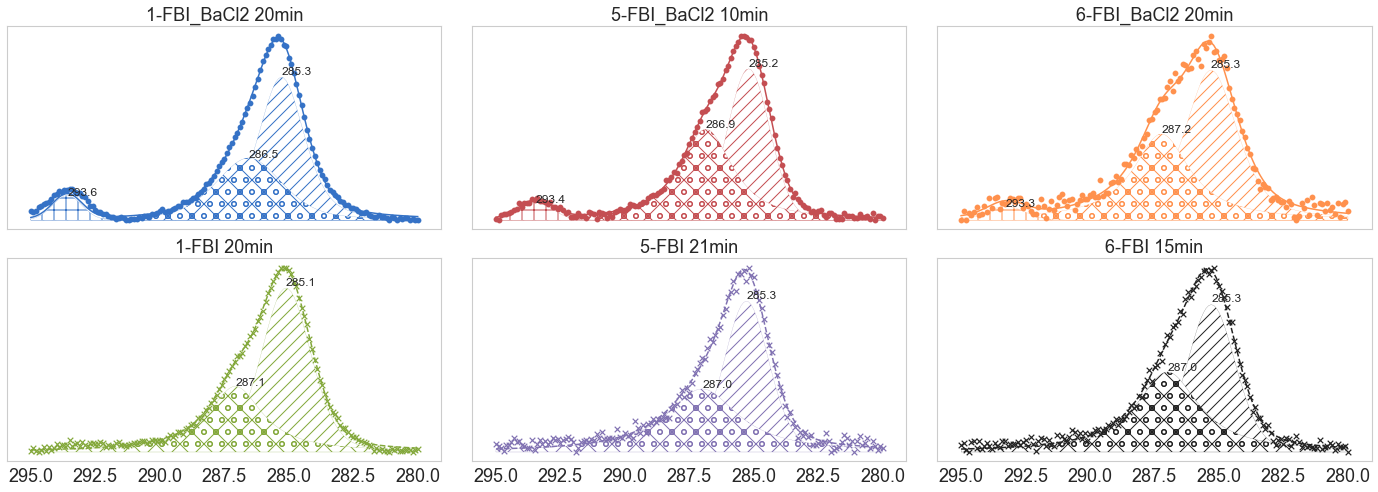

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 3, sharex=True, figsize=(19, 7), )
region = 'C_1s'
pars = [100, 293.3, 1]
bounds = [(50, 500), (293, 294), (0.5, 2.)]

for i,xp in enumerate(fbiBa_exps):
    Fn = XPFit(xp, region=region)
    if i == 2: Fn.preset_pars(key='v1_amplitude', val=2200)
    if i == 0 : 
        Fn.preset_pars(key='v2_amplitude', val=3400)
#         Fn.preset_pars(key='v2_fraction', val=0.7)
        

    fitvv = Fn.double_voigt(sepPt=286.5)
    Fn.gauss_shoulder(fitvv, par_g=pars, bounds_g=bounds)
    Fn.plot( ax = ax1[i])
    ax1[i].set(title=xp.name, yticks=[])
    Fn.set_areas()
    

amp = [3000, 2000, 3300]
for i, xp in enumerate(fbi_sel):
    Fn = XPFit(xp, region=region)
    Fn.preset_pars(key='v1_amplitude', val=amp[i])
    
    Fn.double_voigt(sepPt=286.5)
    Fn.plot( ax = ax2[i], marker='x', ls = 'dashed')
    ax2[i].invert_xaxis()
    ax2[i].set(title=xp.name, yticks=[])
    Fn.set_areas()
plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)
ax2[i].get_legend().remove()
ax2[i].set(xlabel='', ylabel='')
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/fits_c1s.png', dpi=200)

Modify user pars


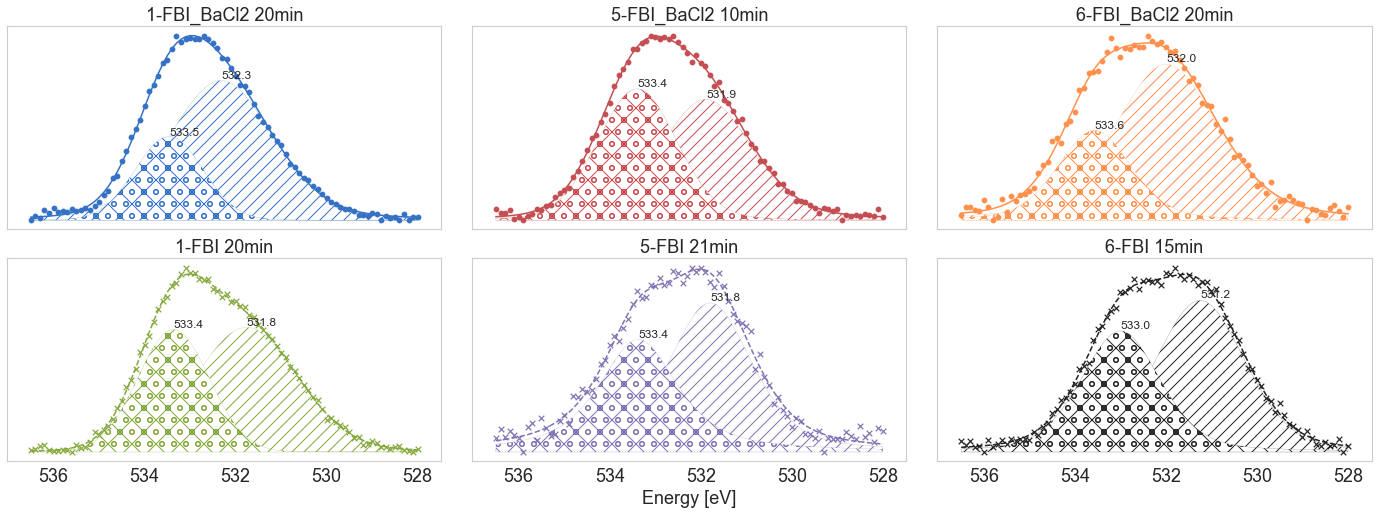

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 3, sharex=True, figsize=(19, 7), )
region = 'O_1s'

for i,xp in enumerate(fbiBa_exps):
    Fn = XPFit(xp, region=region)

    Fn.double_voigt(sepPt=532)
    Fn.plot( ax = ax1[i])
    ax1[i].set(title=xp.name, yticks=[])
    Fn.set_areas()
    
for i, j in enumerate([0, 8, 9]):
    Fn = XPFit(fbi_exps[j], region=region)
    if i == 1: 
        Fn.preset_pars(key='v1_amplitude', val=1400)
        ax2[i].set_xlabel('Energy [eV]')

    Fn.double_voigt(sepPt=532)
    Fn.plot( ax = ax2[i], marker='x', ls = 'dashed')
    ax2[i].invert_xaxis()
    ax2[i].set(title=fbi_exps[j].name, yticks=[])
    Fn.set_areas()
plt.tight_layout(w_pad=0.5, h_pad=0.5, pad=0.1)
ax2[i].get_legend().remove()
ax2[i].set(xlabel='', ylabel='')
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/fits_o1s.png', dpi=200)

In [197]:
region = 'C_1s'
table_fit_area(fbi_sel, region='C_1s')

comp	center	fwhm	amplitude	area	
v1	285.11	 2.27	 3000.00	 0.64
v2	287.07	 2.55	 1795.84	 0.36
v1	285.29	 2.05	 2000.00	 0.55
v2	287.01	 3.37	 1850.13	 0.45
v1	285.30	 2.20	 3300.00	 0.53
v2	287.00	 2.93	 3257.07	 0.47


In [228]:
region = 'C_1s'
table_fit_area(fbiBa_exps, region='C_1s')

comp	center	fwhm	amplitude	area	
v1	285.40	 2.28	 6483.81	 0.71
v2	287.26	 2.35	 2267.05	 0.23
g1	293.59	 1.34	 500.00	 0.06
v1	285.20	 1.92	 1774.18	 0.49
v2	286.86	 2.47	 1888.27	 0.47
g1	293.45	 1.53	 162.49	 0.04
v1	285.31	 2.42	 2200.00	 0.57
v2	287.23	 2.66	 1641.41	 0.40
g1	293.26	 1.70	 113.43	 0.03


## Ba 3d

In [7]:
region = 'Ba_3d'

In [8]:
for xp in scaledCl2:
    crop_spectrum(xp, region, eup=801, edw=776, inplace=True)
for xp in scaledClO4:
    crop_spectrum(xp, region, eup=801, edw=776, inplace=True)    

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:67: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


In [16]:
def hatchplot_fit(xp: XPS_experiment, region: str, fitRes: ModelResult,
                  lb : str = None, marker = 'o', ls: str = 'solid', colc: str = None,
                  ax = None, plot_comps: bool = True, flag_fill: bool = False):

    """"Plot fit result with predefined hatch patterns for each component (up to three components)"""
    if ax == None : ax = plt.gca()
    if lb == None: lb = xp.name
    if colc == None: colc = xp.color

    p1 = ax.scatter(xp.dfx[region].energy, xp.dfx[region].counts, marker=marker, label=lb, zorder = 1)
    p1.set_color(colc)

    x = xp.dfx[region].dropna().energy

    ax.plot(x, fitRes.best_fit, linestyle=ls, color=colc, lw=1.5, label='Fit, $\chi^2_N$ = %i' %fitRes.redchi)
    hatch = ['//', 'ox', '||', '+']

    if plot_comps:
        comps = fitRes.eval_components(x=x)
        for i,compo in enumerate(comps):
            posx = fitRes.best_values[compo+'center']
            ax.text(x=posx, y=comps[compo].max()*1.02, s='%.1f' %posx, fontsize=12)
            ax.fill_between(x, y1 = 0, y2 = comps[compo], alpha=1, label = 'Component @ %.1f eV' %posx ,
                            facecolor='w', hatch = hatch[i], edgecolor=colc, zorder = -1)
    #ax.legend(loc='best')#, bbox_to_anchor=(1.12, 0.5), fontsize=16)
    cosmetics_plot()
    return ax

class XPFit(object):
    def __init__(self, xp: XPS_experiment, region: str):
        self.xp = xp
        self.region = region
        self.x = self.xp.dfx[self.region].dropna().energy.values
        self.y = self.xp.dfx[self.region].dropna().counts.values
        self.userPars = {}

    def preset_pars(self, key: str, val: str):
        self.userPars.update({key: val})

    def set_userPars(self, pars):
        for key, val in zip(self.userPars.keys(), self.userPars.values()):
            pars[key].set(value=val, vary=False)
        return pars

    @staticmethod
    def guess_pars(self, mod, x, y, prefix):
        pars = mod.make_params()
        guess = mod.guess(y, x)

        pars[prefix+'center'].set(value=guess[prefix+'center'].value)
        pars[prefix+'amplitude'].set(value=guess[prefix+'amplitude'].value)
        return pars

    @staticmethod
    def finish_fit(self, mod, pars):
        if self.userPars != {}:
            print('Modify user pars')
            pars = self.set_userPars(pars)

        fitv = mod.fit(self.y, pars, x=self.x)
        self.xp.fit.update({self.region: fitv})
        return fitv

    def plot(self, ax = None, marker: str = 'o', ls: str = 'solid'):
        if ax == None: ax = plt.gca()
        hatchplot_fit(self.xp, self.region, fitRes = self.xp.fit[self.region],
                      ax=ax, plot_comps=True, marker = marker, ls=ls)

    def set_areas(self):
        fit = self.xp.fit[self.region]
        dx = self.x[0] - self.x[1]
        areas, rel_areas = {}, {}
        for key, val in zip(fit.eval_components().keys(), fit.eval_components().values()):
            areas.update({key : np.trapz(val, dx = dx)})
        for key, val in zip(areas.keys(), areas.values()):
            self.xp.area.update({self.region: sum(areas.values() )})
            self.xp.area.update({self.region+'_'+key : val/sum(areas.values())})

    """Model options"""

    def voigt(self, pars: list = None):
        mod = PseudoVoigtModel(prefix='v1_')
        if pars == None:
            pars = self.guess_pars(self, mod, self.x, self.y, prefix='v1_')

        return self.finish_fit(self, mod, pars)

    def double_voigt(self, sepPt = None, pars: list = None, bounds: list = None):
        if sepPt == None: sepPt = find_separation_point(self.x, self.y)

        x1 = self.x[self.x<sepPt]
        x2 = self.x[self.x>sepPt]
        y1 = self.y[self.x<sepPt]
        y2 = self.y[self.x>sepPt]

        mod1 = PseudoVoigtModel(prefix='v1_')
        mod2 = PseudoVoigtModel(prefix='v2_')

        if pars == None:
            pars1 = self.guess_pars(self, mod1, x1, y1, prefix='v1_')
            pars2 = self.guess_pars(self, mod2, x2, y2, prefix='v2_')

        mod = mod1 + mod2
        pars = mod.make_params()
        pars.update(pars1)
        pars.update(pars2)

        return self.finish_fit(self, mod, pars)

    def gauss_shoulder(self, fitv, par_g: list, bounds_g: list, Ng: int = 1):
        gauss2 = GaussianModel(prefix='g'+str(Ng)+'_')
        pars = fitv.params
        pars.update(gauss2.make_params())

        for k,p,b in zip(gauss2.param_names, par_g, bounds_g):
            pars[k].set(value=p, min=b[0], max=b[1])
        mod = fitv.model + gauss2

        return self.finish_fit(self, mod, pars)

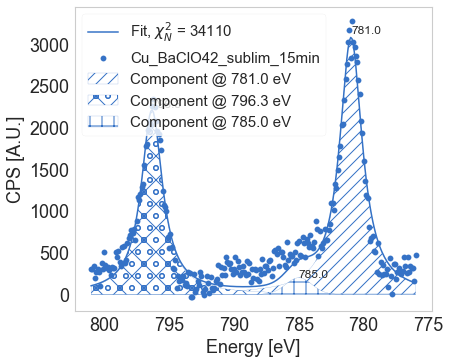

In [11]:
pars = [500, 785, 1]
bounds = [(500, 1.2e3), (785, 786), (0.7, 1.7)]
Fn = XPFit(scaledClO4[0], region)
fitv = Fn.double_voigt(sepPt=790)
Fn.gauss_shoulder(fitv, par_g=pars, bounds_g=bounds, Ng=1)
Fn.plot()

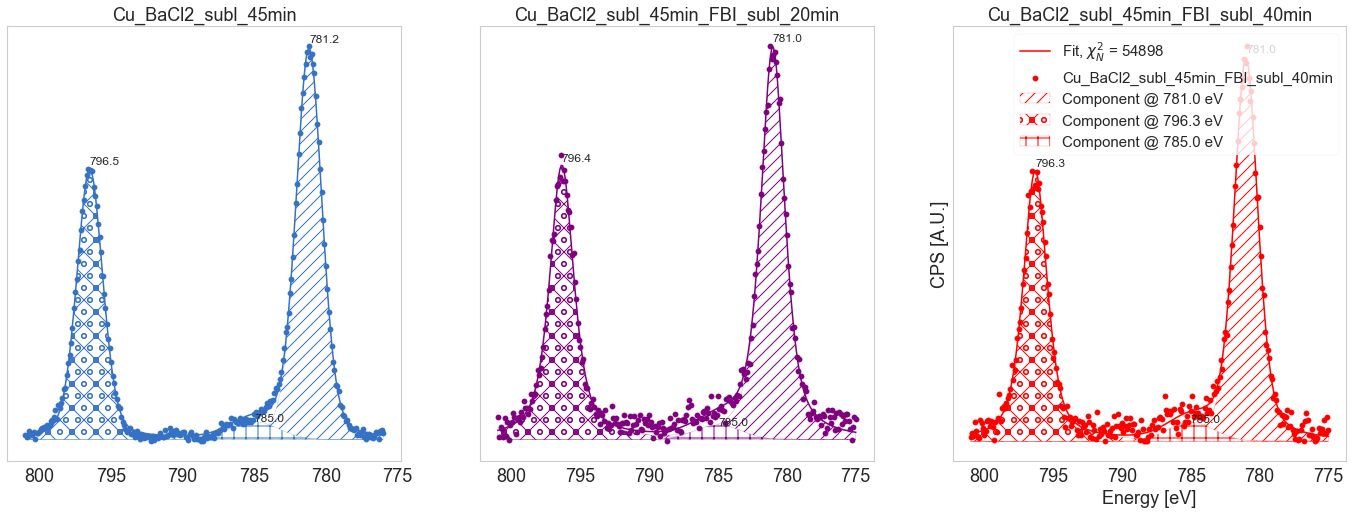

In [125]:
pars = [2e3, 785, 1]
bounds = [(1e3, 3e3), (785, 786), (0.7, 1.7)]

fig, ax = plt.subplots(1, len(scaledCl2), figsize=(8*len(scaledCl2), 8))
for i,xp in enumerate(scaledCl2):
    Fn = XPFit(xp, region=region)
    Fn.double_voigt(sepPt=790)
    Fn.gauss_shoulder(fitv, par_g=pars, bounds_g=bounds, Ng=1)
    
    Fn.plot(ax = ax[i] )
    ax[i].set(title=xp.name, yticks=[])
    ax[i].invert_xaxis()
ax[i].invert_xaxis()

Fn.set_areas()

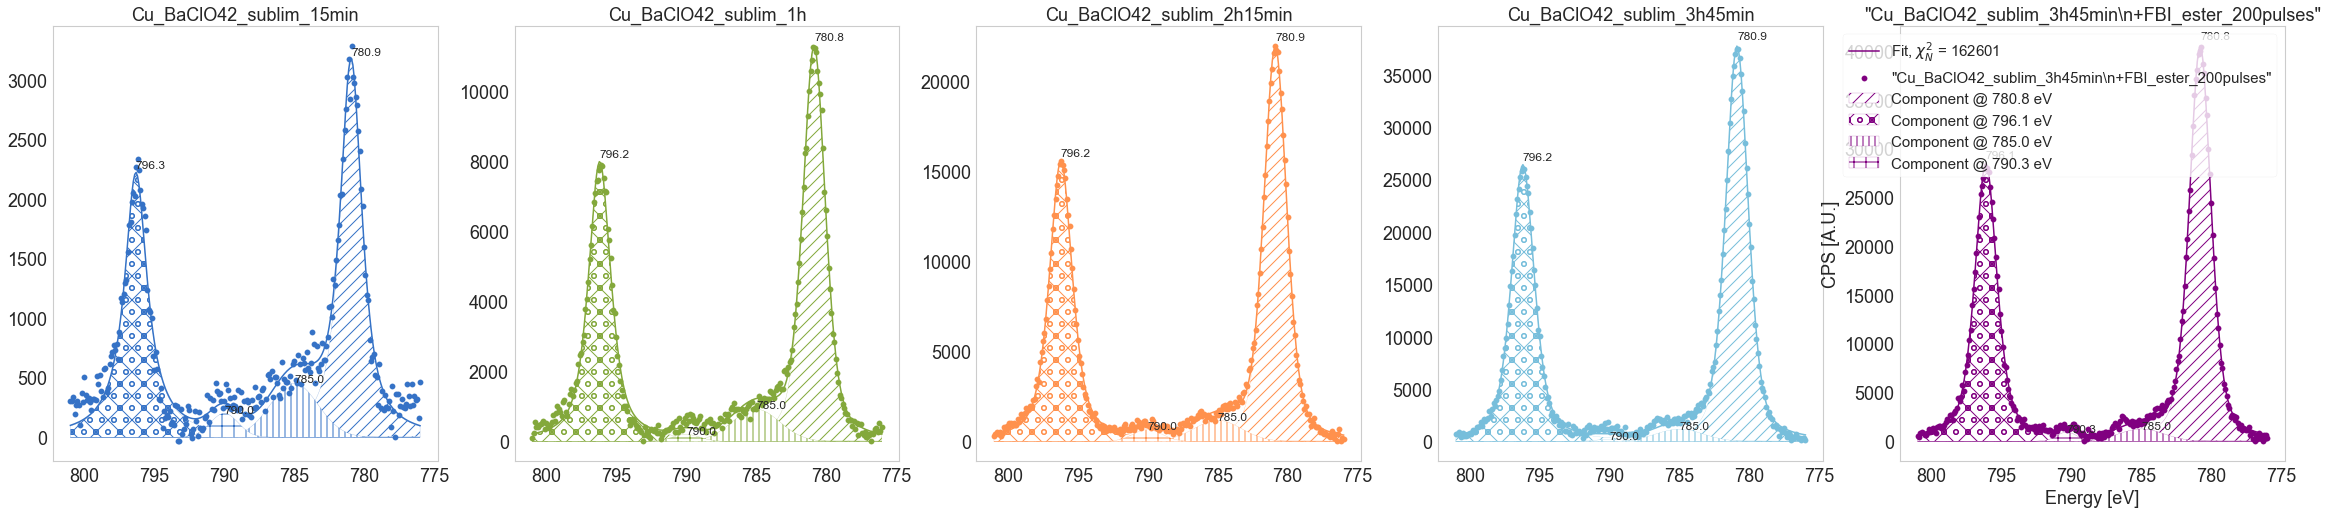

In [142]:
pars = [500, 785, 1]
bounds = [(200, 5e3), (785, 786), (0.7, 1.7)]

pars2 = [500, 790, 1]
bounds2 = [(200, 5e3), (789, 791), (0.7, 1.7)]


fig, ax = plt.subplots(1, len(scaledClO4), figsize=(8*len(scaledClO4), 8))
for i,xp in enumerate(scaledClO4):
    Fn = XPFit(xp, region=region)
    fitv = Fn.double_voigt(sepPt=790)
    fitvg = Fn.gauss_shoulder(fitv, par_g=pars, bounds_g=bounds, Ng=1)
    Fn.gauss_shoulder(fitvg, par_g=pars2, bounds_g=bounds2, Ng=2)
    
    Fn.plot(ax = ax[i] )
    ax[i].set(title=xp.name)#, yticks=[])
    ax[i].invert_xaxis()
ax[i].invert_xaxis()

Fn.set_areas()

## Cl 2p

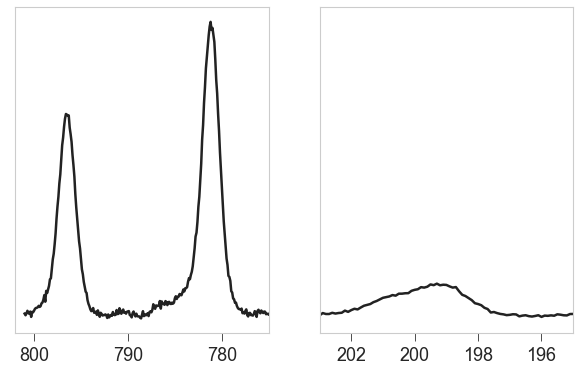

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plot_region(scaledCl2[0], 'Cl_2p', ax=ax[1])
plot_region(scaledCl2[0], 'Ba_3d', ax=ax[0])
ax[0].set(yticks=[], xlim=(802, 775))
ax[1].set(yticks=[], xlim=(203,195), xlabel=None, ylabel=None, ylim=ax[0].get_ylim())
ax[1].get_legend().remove()

In [26]:
asf = dict({'C_1s' : 0.296, 'O_1s' : 0.711, 'N_1s' : 0.477, 'Ba_3d' : 7.49,
            'Br_3p' : 1.054, 'Cu_2p' : 5.321, 'Ba_4d': 2.35, 'Na_1s' : 1.685,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl_2p' : 0.891, 'Si2p': 0.339})

[[],
 (-64.12555735608763, 1218.569387190021),
 Text(0, 0.5, ''),
 (210, 195),
 Text(0.5, 0, '')]

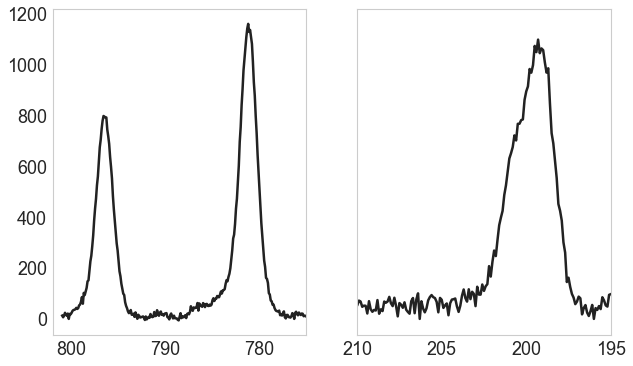

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
xba = scaledCl2[0].dfx['Ba_3d'].dropna().energy.values
yba = scaledCl2[0].dfx['Ba_3d'].dropna().counts.values

xcl = scaledCl2[0].dfx['Cl_2p'].dropna().energy.values
ycl = scaledCl2[0].dfx['Cl_2p'].dropna().counts.values
yba /= asf['Ba_3d']
ycl /= asf['Cl_2p']

ax[0].plot(xba, yba, '-k')
ax[1].plot(xcl, ycl, '-k')

# plot_region(scaledCl2[0], 'Cl_2p', ax=ax[1])
# plot_region(scaledCl2[0], 'Ba_3d', ax=ax[0])
ax[0].set(xlim=(802, 775))
ax[1].set(yticks=[], xlim=(210,195), xlabel=None, ylabel=None, ylim=ax[0].get_ylim())


## Table results

In [182]:
region = 'C_1s'
exps = fbiBa_exps

def table_fit_area(exps: list, region: str):
    """Print a table with fit results and relative areas dict"""
    par_table = ['center', 'fwhm', 'amplitude', 'area']
    head = 'comp\t'

    for par in par_table: 
        head += '%s\t'%par

    print(head)

    for xp in exps:
        fit = xp.fit[region]
        for i, comp in enumerate(fit.components):
            pref = comp.prefix
            line = pref[:-1] + '\t'

            for par in par_table[:-1]:
                line += '%.2f\t '%fit.values[pref + par]        
            line += '%.2f'%xp.area[region+'_'+pref]

            print(line)

In [505]:
table_fit_area(fbiBa_exps, region)

comp	center	fwhm	area	
v1	285.40	 2.28	 0.71
v2	287.27	 2.35	 0.23
g1	293.59	 1.34	 0.06
v1	285.18	 1.88	 0.50
v2	286.78	 2.57	 0.46
g1	293.44	 1.56	 0.05
v1	285.31	 2.42	 0.57
v2	287.23	 2.66	 0.40
g1	293.26	 1.70	 0.03


### Latex style + custom fbi/fbi-ba arrangement

In [96]:
def table_fbifbiba(region):
    """Print a table with fit results and relative areas dict"""
    par_table = ['center', 'fwhm', 'area']
    head = 'exp & comp & '
    head2 = ''
    for par in par_table: 
        head += '%s & '%par
        head2 += '& FBI & FBI-Ba & '
    print(region, ' fits')
    print(head)
    print(head2)

    for xpba, xp in zip(fbiBa_exps, fbi_sel):
        fit = xp.fit[region]
        fitba = xpba.fit[region]
        line = '\hline\n '
        for i, comp in enumerate(fitba.components):
            pref = comp.prefix
            line += '{} & ' + pref[:-1] + ' & '
            for par in par_table[:-1]:
                if i < 2:
                    line += '%.2f & '%fit.values[pref + par]
                line += '%.2f & '%fitba.values[pref + par]
            if i < 2:
                line += '%.2f & '%xp.area[region+'_'+pref]
            line += '%.2f \\\ \n'%xpba.area[region+'_'+pref]
        print(line)

In [184]:
table_fbifbiba('C_1s')

C_1s  fits
exp & comp & center & fwhm & area & 
& FBI & FBI-Ba & & FBI & FBI-Ba & & FBI & FBI-Ba & 
\hline
 {} & v1 & 285.11 & 285.40 & 2.27 & 2.28 & 0.64 & 0.71 \\ 
{} & v2 & 287.07 & 287.27 & 2.55 & 2.35 & 0.36 & 0.23 \\ 
{} & g1 & 293.59 & 1.34 & 0.06 \\ 

\hline
 {} & v1 & 285.29 & 285.18 & 2.05 & 1.88 & 0.55 & 0.50 \\ 
{} & v2 & 287.01 & 286.78 & 3.37 & 2.57 & 0.45 & 0.46 \\ 
{} & g1 & 293.44 & 1.56 & 0.05 \\ 

\hline
 {} & v1 & 285.30 & 285.31 & 2.20 & 2.42 & 0.53 & 0.57 \\ 
{} & v2 & 287.00 & 287.23 & 2.93 & 2.66 & 0.47 & 0.40 \\ 
{} & g1 & 293.26 & 1.70 & 0.03 \\ 



In [98]:
table_fbifbiba('O_1s')

O_1s  fits
exp & comp & center & fwhm & area & 
& FBI & FBI-Ba & & FBI & FBI-Ba & & FBI & FBI-Ba & 
\hline
 {} & v1 & 531.76 & 532.32 & 2.66 & 2.69 & 0.60 & 0.73 \\ 
{} & v2 & 533.37 & 533.46 & 1.84 & 1.75 & 0.40 & 0.27 \\ 

\hline
 {} & v1 & 531.79 & 531.89 & 2.18 & 2.39 & 0.57 & 0.53 \\ 
{} & v2 & 533.37 & 533.40 & 2.05 & 2.04 & 0.43 & 0.47 \\ 

\hline
 {} & v1 & 531.25 & 531.99 & 2.33 & 2.68 & 0.58 & 0.71 \\ 
{} & v2 & 533.00 & 533.57 & 2.05 & 1.89 & 0.42 & 0.29 \\ 



In [99]:
table_fbifbiba('N_1s')

N_1s  fits
exp & comp & center & fwhm & area & 
& FBI & FBI-Ba & & FBI & FBI-Ba & & FBI & FBI-Ba & 
\hline
 {} & v1 & 398.79 & 399.37 & 2.05 & 1.77 & 0.41 & 0.31 \\ 
{} & v2 & 399.95 & 400.44 & 2.09 & 2.28 & 0.59 & 0.69 \\ 

\hline
 {} & v1 & 398.72 & 399.67 & 2.05 & 1.93 & 0.67 & 0.81 \\ 
{} & v2 & 400.88 & 401.56 & 5.06 & 1.83 & 0.33 & 0.19 \\ 

\hline
 {} & v1 & 398.74 & 399.13 & 2.26 & 2.15 & 0.72 & 0.60 \\ 
{} & v2 & 401.23 & 401.35 & 2.06 & 3.33 & 0.28 & 0.40 \\ 



# Compare Ba with and without FBI

In [12]:
path = '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/**/*.xy'
files = glob.glob(path, recursive=True)
files.sort()
files_new = []
for f in files:
    if ('BaCl2' in f ) and ('/proc' in f):
        files_new.append(f)
files = files_new
files

['/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_09_22_Cu/proc/20200928_1-Cu_FBI_BaCl2_subl_20min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_19_Cu/proc/20201020_5-Cu_FBI_BaCl2_subl_10min.xy',
 '/Users/pabloherrero/sabat/xps_spectra/FBI_Cu/FBI_subl/2020_10_21_Cu/proc/20201021_6-Cu_FBI_BaCl2_subl_20min.xy']

In [18]:
fbiba_exps = []
for f in files:
    fbiba_exps.append(read_processed_xp(f))
    print(fbiba_exps[-1].name)

1-FBI_BaCl2 20min
5-FBI_BaCl2 10min
6-FBI_BaCl2 20min


In [52]:
for xp in fbiba_exps:
    xp.name = xp.name.replace('_BaCl2', '-BaCl$_2$')

In [19]:
fbiba_exps[0].color = 'b'
fbiba_exps[1].color = 'red'
fbiba_exps[2].color = 'y'

### Ba 3d

In [21]:
for xp in fbiba_exps:
    crop_spectrum(xp, region, eup=801, edw=776, inplace=True)    

/Users/pabloherrero/sabat/sabatsw/xps/xps_analysis.py:67: RuntimeWarning: invalid value encountered in greater
  dropup = np.where(xp.dfx[region].energy.values > eup)[0]


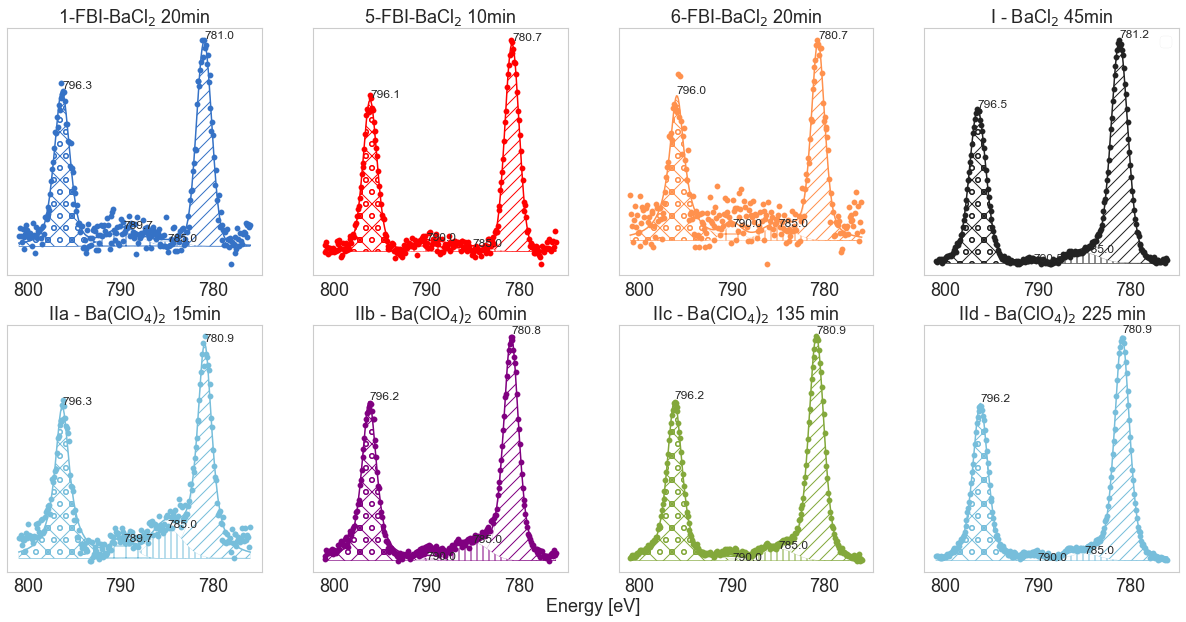

In [72]:
region = 'Ba_3d'
fig, ax = plt.subplots(2, len(fbiba_exps)+1, figsize=(21, 10))
fig.add_subplot(111, frameon=False, xticks=[], yticks=[])  # Used for common xlabel and ylabel
    
pars = [500, 785, 1]
bounds = [(150, 5e3), (785, 786), (0.7, 1.7)]

pars2 = [200, 790, 1]
bounds2 = [(150, 5e3), (789, 791), (0.7, 1.7)]


for i,xp in enumerate(fbiba_exps + [scaledCl2[0]]):
    Fn = XPFit(xp, region=region)
    fitv = Fn.double_voigt(sepPt=790)
    fitvg = Fn.gauss_shoulder(fitv, par_g=pars, bounds_g=bounds, Ng=1)
    Fn.gauss_shoulder(fitvg, par_g=pars2, bounds_g=bounds2, Ng=2)
    
    Fn.plot(ax = ax[0,i] )
    ax[0,i].set(title=xp.name, yticks=[])
    ax[0,i].invert_xaxis()
    
for i,xp in enumerate(scaledClO4[:-1]):
    Fn = XPFit(xp, region=region)
    fitv = Fn.double_voigt(sepPt=790)
    fitvg = Fn.gauss_shoulder(fitv, par_g=pars, bounds_g=bounds, Ng=1)
    Fn.gauss_shoulder(fitvg, par_g=pars2, bounds_g=bounds2, Ng=2)
    
    Fn.plot(ax = ax[1,i] )
    ax[1,i].set(title=xp.name, yticks=[])
    ax[1,i].invert_xaxis()
# ax[1,i].get_legend().remove()
ax[1,i].set(ylabel='', xlabel='')
plt.xlabel('\nEnergy [eV]')
plt.ylabel('')

plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/fits_BaCl2_BaClO42.png', dpi=200)

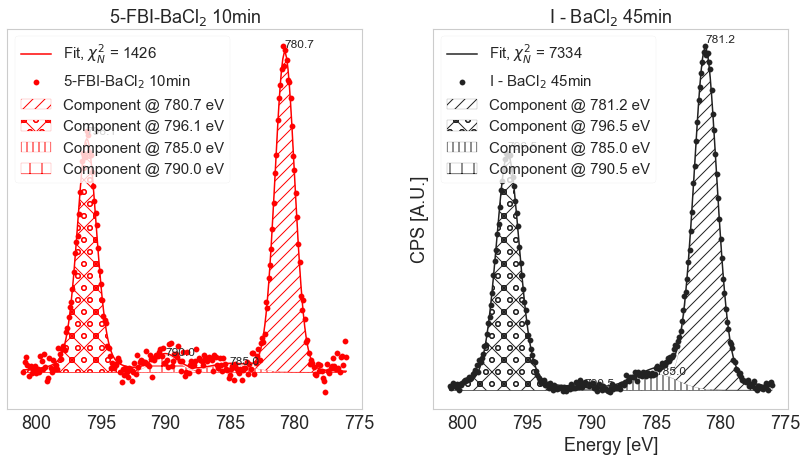

In [70]:
sel = [fbiba_exps[1], scaledCl2[0]]
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
pars = [500, 785, 1]
bounds = [(150, 5e3), (785, 786), (0.7, 1.7)]

pars2 = [200, 790, 1]
bounds2 = [(150, 5e3), (789, 791), (0.7, 1.7)]

for i, xp in enumerate(sel):
    Fn = XPFit(xp, region)
    fitv = Fn.double_voigt(sepPt=790)
    fitvg = Fn.gauss_shoulder(fitv, par_g=pars, bounds_g=bounds, Ng=1)
    Fn.gauss_shoulder(fitvg, par_g=pars2, bounds_g=bounds2, Ng=2)
    
    Fn.plot(ax = ax[i] )
    ax[i].legend()
    ax[i].set(title=xp.name, yticks=[])
    ax[i].invert_xaxis()
    # ax.get_legend().remove()
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/fits_Ba3dCl2.png', dpi=200)

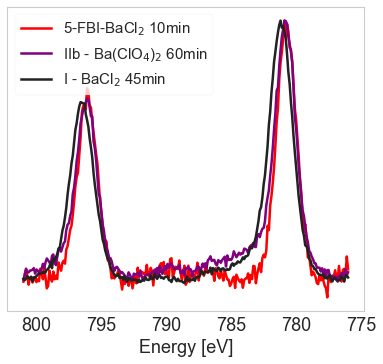

In [64]:
sel = [fbiba_exps[1], scaledClO4[1], scaledCl2[0]]
ax = plt.gca()
for i,xp in enumerate(sel):
    xpn = normalise_dfx(xp)
    plot_region(xpn, region)
    ax.set(title='', yticks=[], ylabel='')
# ax.invert_xaxis()
plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/ba3d_tail.png', dpi=200)

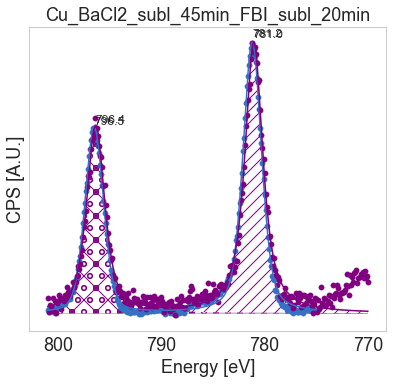

In [106]:
sel = [scaledCl2[0], scaledCl2[1]]
ax = plt.gca()
for i,xp in enumerate(sel):
    xpn = normalise_dfx(xp)
    Fn = XPFit(xpn, region=region)
    Fn.double_voigt(sepPt=790)
    Fn.plot(ax = ax )
    ax.set(title=xp.name, yticks=[])
ax.invert_xaxis()
ax.get_legend().remove()
# Fn.set_areas()

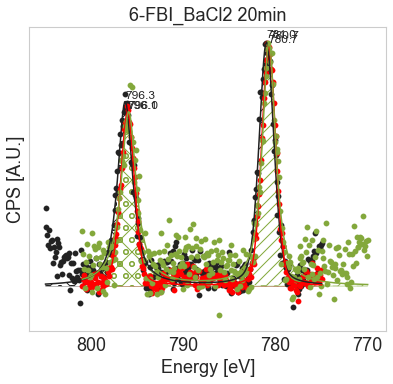

In [113]:
sel = [fbiba_exps[0], fbiba_exps[1], fbiba_exps[2]]
ax = plt.gca()
for i,xp in enumerate(sel):
    xpn = normalise_dfx(xp)
    Fn = XPFit(xpn, region=region)
    Fn.double_voigt(sepPt=790)
    Fn.plot(ax = ax )
    ax.set(title=xp.name, yticks=[])
# ax.invert_xaxis()
ax.get_legend().remove()
# Fn.set_areas()

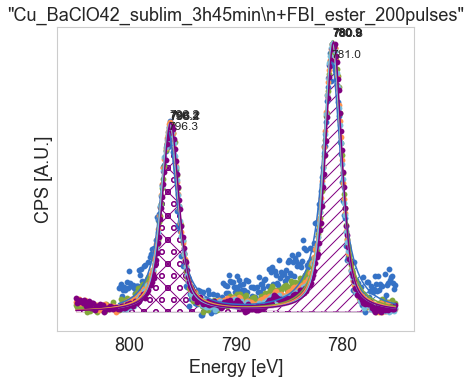

In [114]:
ax = plt.gca()
for i,xp in enumerate(scaledClO4):
    xpn = normalise_dfx(xp)
    Fn = XPFit(xpn, region=region)
    Fn.double_voigt(sepPt=790)
    Fn.plot(ax = ax )
    ax.set(title=xp.name, yticks=[])
# ax.invert_xaxis()
ax.get_legend().remove()
# Fn.set_areas()

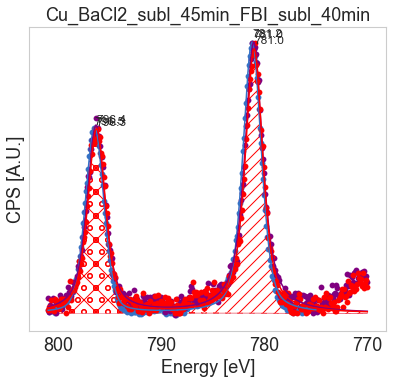

In [112]:
ax = plt.gca()
for i,xp in enumerate(scaledCl2):
    xpn = normalise_dfx(xp)
    Fn = XPFit(xpn, region=region)
    Fn.double_voigt(sepPt=790)
    Fn.plot(ax = ax )
    ax.set(title=xp.name, yticks=[])
# ax.invert_xaxis()
ax.get_legend().remove()
# Fn.set_areas()

### Cl 2p

Modify user pars
Modify user pars
Modify user pars
Modify user pars
Modify user pars
Modify user pars
Modify user pars
Modify user pars


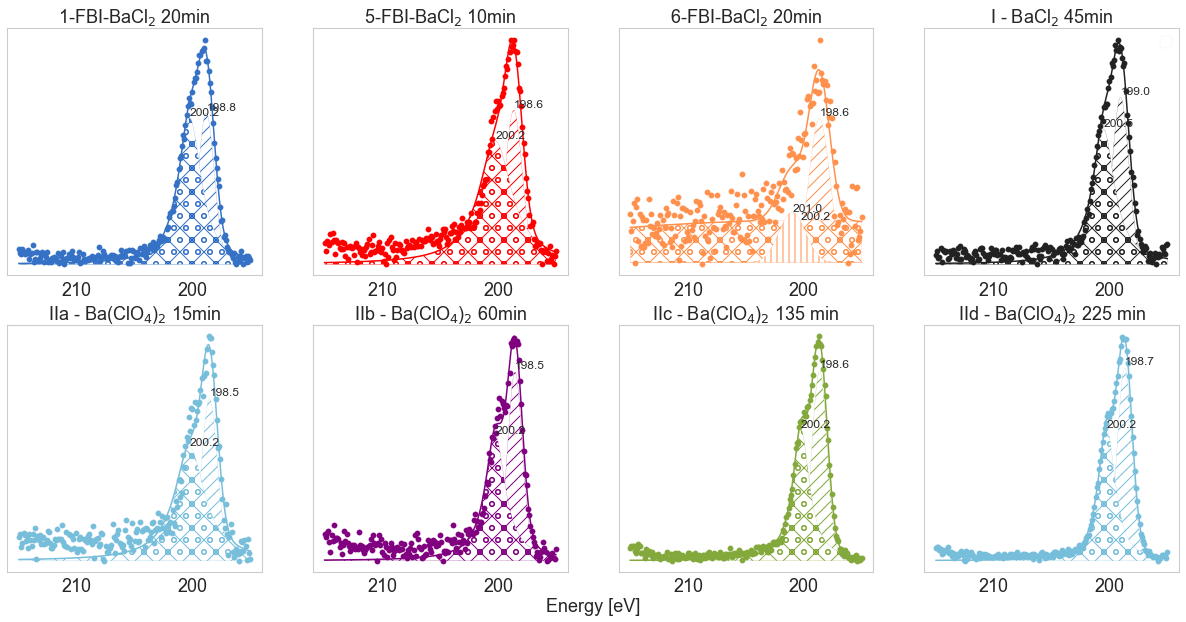

In [87]:
region = 'Cl_2p'
fig, ax = plt.subplots(2, len(fbiba_exps)+1, figsize=(21, 10))
fig.add_subplot(111, frameon=False, xticks=[], yticks=[])  # Used for common xlabel and ylabel
    
pars = [500, 202, 2]
bounds = [(150, 5e3), (201, 204), (0.7, 3.7)]

for i,xp in enumerate(fbiba_exps + [scaledCl2[0]]):
    Fn = XPFit(xp, region=region)
    if i < 3:
        Fn.preset_pars(key='v2_center', val=200.24)
    fitv = Fn.double_voigt(sepPt=199)
    if i == 2:
        Fn.gauss_shoulder(fitv, par_g = pars, bounds_g = bounds)
    
    Fn.plot(ax = ax[0,i] )
    ax[0,i].set(title=xp.name, yticks=[])
    ax[0,i].invert_xaxis()
    
for i,xp in enumerate(scaledClO4[:-1]):
    Fn = XPFit(xp, region=region)
    Fn.preset_pars(key='v2_center', val=200.24)
    
    fitv = Fn.double_voigt(sepPt=199)
    
    Fn.plot(ax = ax[1,i] )
    ax[1,i].set(title=xp.name, yticks=[])
    ax[1,i].invert_xaxis()
# ax[1,i].get_legend().remove()
ax[1,i].set(ylabel='', xlabel='')
plt.xlabel('\nEnergy [eV]')
plt.ylabel('')

plt.gcf().savefig('/Users/pabloherrero/Dropbox/phd/papers/fbi_cu_sublimation/fits_Cl2p_ClO42.png', dpi=200)

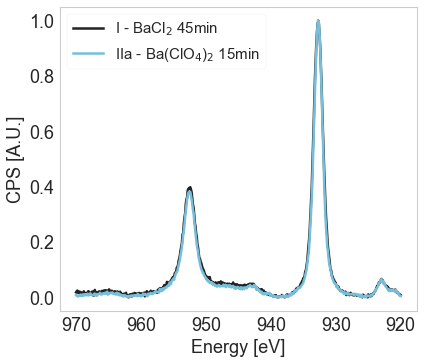

In [86]:
plot_region(normalise_dfx(scaledCl2[0]) , 'Cu_2p')
plot_region(normalise_dfx(scaledClO4[0]), 'Cu_2p')
cosmetics_plot()